In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('../data/csv/cnn_embedings.csv')

In [3]:
df.sample(5)

,id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
3089,81945,0.823822,2.180226,6.906126,1.130674,0.295938,1.449624,1.839811,0.000000,1.405957,...,0.000000,6.150650,7.472189,2.293349,4.149301,9.376631,0.0,2.582013,1.782969,1.620911
874,136705,2.609621,2.310964,5.173504,2.467693,4.025921,0.163259,0.730313,0.781247,1.482054,...,0.438502,7.094087,0.446148,0.000000,5.827675,3.303793,0.0,7.256816,0.888406,3.026180
158,110106,7.997944,14.715649,9.130058,1.165268,0.000000,0.000000,16.730978,7.181098,0.840004,...,6.275949,7.187453,1.896807,7.840817,2.481114,0.000000,0.0,5.088972,1.345780,1.435708
2565,126607,1.124603,0.000000,5.050829,2.811541,4.094738,0.000000,0.000000,0.000000,0.975357,...,1.410360,6.004306,1.130072,0.000000,6.061779,3.069753,0.0,7.392242,0.144445,2.332201
703,26765,0.000000,0.000000,4.796775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.320861,5.366962,5.381407,3.142992,3.162737,1.023408,0.0,2.026742,0.903019,2.761045


In [4]:
df.shape

(7994, 2049)

In [5]:
with open('../pickles_for_git/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [6]:
df_info = pd.read_csv('../data/csv/info.csv')
df_info.sample(5)

,id,artist,title,genre,track,tags,test
7067,145058,Ersatz,Worm Fortress,Experimental,145058.mp3,"['unclassifiable', 'experimental', 'drone', 'e...",0
5316,119134,FortyOne,i want the princess!,Experimental,119134.mp3,"['experimental', 'minimalism', 'comfort stand'...",0
5566,17637,Jalikebba Kuyateh and the Toubabs,Bamba Bojang,International,017637.mp3,"['folk', 'international', 'indian', 'african']",0
6626,62534,Tommy Tornado,Closing,International,062534.mp3,"['dub', 'international', 'reggae - dancehall',...",0
1672,84768,What Cheer? Brigade,CCMFC,Instrumental,084768.mp3,"['creative commons', 'big band', 'rhode island...",0


In [7]:
df[df['id'] == 110261]

,id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
79,110261,3.145618,8.639644,7.593509,2.511812,0.695761,1.593677,7.475707,6.414621,0.439064,...,3.803839,8.528682,0.85772,2.613468,0.0,0.0,0.0,2.767794,1.58897,1.339172


In [8]:
df_info[df_info['test'] == 1]

,id,artist,title,genre,track,tags,test
6,190,Ed Askew,Castle Of Stars,Folk,000190.mp3,"['poetry', 'psychedelic folk', 'folk', 'experi...",1
8,194,Ed Askew,All I want to Do,Folk,000194.mp3,"['experimental', 'psychedelic folk', 'folk', '...",1
33,667,Explode Into Colors,Sharpen The Knife,International,000667.mp3,"['experimental', 'no-wave', 'international', '...",1
61,1040,Lightning Bolt,Dracula Mountain,Rock,001040.mp3,"['rock', 'experimental', 'avant-garde', 'noise...",1
137,3720,Indian Jewelry,Walking on the Water,Rock,003720.mp3,"['rock', 'experimental', 'drone', 'metaphysiqu...",1
...,...,...,...,...,...,...,...
7329,1686,The Sounds of Taraab,Rufiji,International,001686.mp3,['international'],1
7337,4233,The Sounds of Taraab,Interview,International,004233.mp3,"['middle east', 'international', 'african']",1
7374,27454,Sun Araw,Track 1,Experimental,027454.mp3,"['experimental', 'sun araw', 'drone', 'le club...",1
7386,40851,Str8 Sounds,Moving Toward You,Electronic,040851.mp3,['electronic'],1


In [9]:
df_test = df_info[df_info['test'] == 1][['id']].merge(df, how='left', on='id')
df_test.shape

(97, 2049)

In [10]:
df_train = df_info[df_info['test'] == 0][['id']].merge(df, how='left', on='id')
df_train.shape

(7903, 2049)

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.shape

(7897, 2049)

In [23]:
df_train.to_csv('../data/csv/train.csv', index=False)
df_test.to_csv('../data/csv/test.csv', index=False)

In [13]:
X_train = df_train.drop(columns=['id']).values
X_test = df_test.drop(columns=['id']).values

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity_mtx = cosine_similarity(X_test, X_train)

In [15]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].id)
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].id)
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].id)
        if track in relevant_list:
            dcg += 1 / np.log2(i + 2)
        idcg += 1 / np.log2(i + 2)
    ndcg = dcg / idcg
    return ndcg



In [16]:
mean_ap = 0
ndcg = 0
for i in range(97):
    arr = cos_similarity_mtx[i]
    neighbors = arr.argsort()[-10:][::-1]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 97 
mean_ndcg = ndcg / 97

In [17]:
mean_ap

0.09690721649484532

In [18]:
mean_ndcg

0.11641570668365861

In [19]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [22]:
for dist in ['euclidean', 'manhattan', 'chebyshev', 'braycurtis', 'canberra', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'cosine']:
    dist_mtx = pairwise_distances(X_test, X_train, metric=dist)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        arr = dist_mtx[i]
        neighbors = arr.argsort()[:10]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(dist, mean_ap, mean_ndcg)

euclidean 0.09381443298969067 0.11193040586885095
manhattan 0.11649484536082469 0.13350915294093946
chebyshev 0.07731958762886595 0.09240028296387581
braycurtis 0.1257731958762886 0.15273087131086568
canberra 0.10309278350515458 0.1279732731771981
correlation 0.10824742268041233 0.12639139374626548


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


dice 0.0010309278350515464 0.0008082295770997456
hamming 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


jaccard 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


kulsinski 0.0010309278350515464 0.0008082295770997456
minkowski 0.09381443298969067 0.11193040586885095


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


rogerstanimoto 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


russellrao 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1453: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


seuclidean 0.05154639175257732 0.0622993166205115


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


sokalmichener 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


sokalsneath 0.0010309278350515464 0.0008082295770997456
sqeuclidean 0.09381443298969067 0.11193040586885095


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


yule 0.0010309278350515464 0.0008082295770997456
cosine 0.10927835051546388 0.12689078314228225


In [170]:
for dist in ['euclidean', 'manhattan', 'chebyshev', 'braycurtis', 'canberra', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'cosine']:
    dist_mtx = pairwise_distances(X_test, X_train, metric=dist)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        arr = dist_mtx[i]
        neighbors = arr.argsort()[:10]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(dist, mean_ap, mean_ndcg)

euclidean 0.10618556701030923 0.1233855350427249
manhattan 0.1298969072164948 0.14709440841683796
chebyshev 0.08453608247422678 0.09880648083976178
braycurtis 0.13608247422680406 0.16320911971695717
canberra 0.1103092783505154 0.13634928309423044
correlation 0.11649484536082472 0.13569093005890856


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


dice 0.0030927835051546395 0.005346204139946759
hamming 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


jaccard 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


kulsinski 0.0030927835051546395 0.005346204139946759
minkowski 0.10618556701030923 0.1233855350427249


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


rogerstanimoto 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


russellrao 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1453: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


seuclidean 0.05257731958762886 0.064568303901935


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


sokalmichener 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


sokalsneath 0.0030927835051546395 0.005346204139946759
sqeuclidean 0.10618556701030923 0.1233855350427249


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


yule 0.0030927835051546395 0.005346204139946759
cosine 0.11752577319587626 0.13619031945492532


In [53]:
from sklearn.neighbors import NearestNeighbors
for dist in ['euclidean', 'manhattan', 'chebyshev']:
    neigh = NearestNeighbors(10, metric=dist)
    neigh.fit(X_train)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        neighbors = neigh.kneighbors([X_test[i]])[1][0]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(neigh.metric, mean_ap, mean_ndcg)

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


euclidean 0.10618556701030923 0.12198870811609176


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


manhattan 0.11752577319587626 0.13476945604241305


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


chebyshev 0.09175257731958761 0.10438718939528636


In [126]:
neigh = NearestNeighbors(n_neighbors=10, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(metric='manhattan', n_neighbors=10)

In [63]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
#         relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#         print(relevant_list)
    id_list = [int(df_train.iloc[x].id) for x in neighbors]
    print(int(df_test.iloc[i].id), id_list)
        

190 [89485, 38834, 105716, 621, 48042, 7711, 116872, 138416, 109896, 105715]
194 [29971, 142516, 142519, 12052, 10810, 118886, 67764, 38826, 52954, 126786]
667 [71714, 59445, 19891, 52393, 79741, 123458, 77521, 666, 96560, 20374]
1040 [98701, 73318, 21676, 40986, 145020, 131536, 57500, 97286, 68820, 87490]
3720 [47471, 54037, 80402, 51278, 58225, 121661, 666, 124394, 115002, 92885]
4079 [71709, 74372, 38522, 44798, 4076, 18887, 24369, 145783, 19413, 129046]
4835 [47526, 132784, 56474, 4108, 4838, 15476, 107955, 60533, 136094, 128825]
5264 [4682, 4688, 69564, 71240, 75754, 4685, 11867, 6608, 6610, 98625]
10382 [139003, 123760, 137168, 52860, 34258, 68579, 45393, 109144, 121657, 114398]
93075 [7377, 42235, 17611, 26659, 143060, 58162, 4848, 107046, 43025, 23505]
97886 [97887, 125777, 121813, 123867, 99442, 72288, 109355, 131979, 95231, 1270]
99411 [111658, 131451, 127330, 58115, 117450, 95535, 73192, 59448, 63191, 76121]
99419 [53807, 73192, 111335, 111872, 104227, 54942, 106954, 109355,

In [64]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    print(relevant_list)
#     id_list = [int(df_train.iloc[x].id) for x in neighbors]
#     print(int(df_test.iloc[i].id), id_list)
        

[190, 621]
[194, 12052]
[667, 666]
[1040]
[3720]
[4079, 4076]
[4835, 4838, 136094]
[5264, 4682, 4688, 4685]
[10382]
[93075]
[97886, 97887]
[99411, 73192]
[99419, 53807, 73192]
[11786]
[12050, 12060, 40245]
[12394]
[14063]
[17607, 43024]
[19759, 19758, 66650, 149103]
[21401]
[22476]
[24429, 36983, 36984]
[24431, 24425, 36987, 24432]
[81554]
[85027]
[85832]
[86788]
[87097, 30196, 131917, 108885]
[87100, 87105, 131917]
[104282]
[107579]
[108879, 108884, 69762]
[108962]
[69204, 69207]
[71620, 71617]
[73365, 73371, 73367, 128484]
[73368, 141616, 97544]
[73761]
[73764]
[74421]
[75317]
[75417, 75380, 98548, 75372, 58207, 75396, 75418]
[75436, 75429]
[75752]
[49073, 7548]
[51305]
[55121, 61175, 55124]
[55235, 148074]
[57273, 107532]
[24898, 24899, 24915, 44347]
[24901, 90278, 24899]
[25234, 25235, 25227, 25233]
[25603, 152103, 148076]
[26021, 26017]
[26600]
[33020]
[35462]
[124702]
[124754, 130129]
[124876, 131911]
[125154]
[125161]
[39291]
[39357]
[40233, 10447, 10481, 10386, 10485, 53587, 11

In [172]:
neigh = NearestNeighbors(n_neighbors=10, metric='braycurtis')
neigh.fit(X_train)

NearestNeighbors(metric='braycurtis', n_neighbors=10)

In [173]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    print(relevant_list)

[190]
[194, 200, 211]
[667, 666]
[1040]
[3720]
[4079, 4076]
[4835]
[5264, 4682, 4685]
[10382]
[93075]
[97886, 97887]
[99411, 73192]
[99419, 53807, 73192, 73193]
[11786, 11793]
[12050, 12060, 40244, 40245]
[12394]
[14063]
[17607, 43024, 56468]
[19759, 19758, 66650, 149103]
[21401]
[22476]
[24429, 36984, 36994]
[24431, 36987, 24425]
[81554]
[85027]
[85832]
[86788]
[87097, 30196, 131917, 87099]
[87100, 87105, 87103, 87104, 87099, 87098]
[104282]
[107579]
[108879, 108884]
[108962, 52522]
[69204, 92551]
[71620, 71617]
[73365, 73367, 73371]
[73368, 73370]
[73761]
[73764]
[74421]
[75317]
[75417, 75380, 75396, 75389, 98548, 58207]
[75436, 75429]
[75752, 108490]
[49073, 7548]
[51305]
[55121, 55124, 61175]
[55235, 148074]
[57273, 107532]
[24898, 24899, 90278, 24917, 24915]
[24901, 90278, 24899, 24917]
[25234, 25235, 25227, 25233, 25232]
[25603]
[26021, 26017]
[26600]
[33020]
[35462, 57627]
[124702, 11782]
[124754]
[124876, 131911]
[125154]
[125161]
[39291]
[39357]
[40233, 10447, 10481, 10485, 53

In [127]:
nei gh.kneighbors([X_test[0]])

(array([[1753.17949472, 1768.10015142, 1799.57718028, 1842.47599761,
         1881.04826856, 1882.1805356 , 1885.58850433, 1929.62312179,
         1942.72758734, 1948.20557632]]),
 array([[ 464, 3719, 1966,   28, 4559,  329, 5127, 7777, 2284, 1965]]))

In [21]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X_test, X_train, metric='manhattan')

In [155]:
idx = dist[0].argsort()
idx[:10]

array([ 464, 3719, 1966,   28, 4559,  329, 5127, 7777, 2284, 1965])

In [83]:
c = 0
for i in main_dict:
    if len(main_dict[i]['all_tags']) < 2:
        print(main_dict[i]['artist_name'], '-', main_dict[i]['track_title'])
        c += 1
c

Glove Compartment - Relaxing
Peter Biedermann - Circles
Peter Biedermann - Copenhagen
Peter Biedermann - Running
Peter Biedermann - Christiania
Peter Biedermann - The Uncommon Man
Peter Biedermann - Labyrinth
Peter Biedermann - Cover Up
Alan Vega & Oneida - Rocket USA
Mported Flows - Advice (Instrumental)
Mported Flows - Sensitive Information
Mported Flows - Master Plan (Dark Days Instrumental)
Mported Flows - Master Plan (Show Disc Instrumental)
Mported Flows - Master Plan (Bonus Beat Break Dubb)
Mported Flows - Sad But True (Non-Album Track)
Three Jolly Rogues - The Fish in the Sea
Three Jolly Rogues - Good Old Colony Days
The Bins & Nardo - Dreams Of Summer
Deadly Combo - Can I Get A Clap
Deadly Combo - Once Again (Featuring E FeungShui, J-Phillz, Javier Starks, Golden Child, Dave C & Cable)
Deadly Combo - Back To Break Bread (Instrumental)
Deadly Combo - Incredible Things (Instrumental)
Deadly Combo - Incredible Things (Featuring Golden Child) (Accapella)
Deadly Combo - Think Logic

528

In [97]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [98]:
cos_similarity_mtx = cosine_similarity(X_test, X_train)

In [99]:
mean_ap = 0
ndcg = 0
for i in range(97):
    arr = cos_similarity_mtx[i]
    neighbors = arr.argsort()[-10:][::-1]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 97 
mean_ndcg = ndcg / 97
print(mean_ap, mean_ndcg)

0.11855670103092777 0.13406893551584873


In [100]:
for dist in ['euclidean', 'manhattan', 'chebyshev']:
    neigh = NearestNeighbors(n_neighbors=10, metric=dist)
    neigh.fit(X_train)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        neighbors = neigh.kneighbors([X_test[i]])[1][0]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(neigh.metric, mean_ap, mean_ndcg)

euclidean 0.10721649484536078 0.12144433887637733
manhattan 0.12268041237113399 0.13432929444693986
chebyshev 0.08453608247422678 0.09880648083976178


In [103]:
from sklearn.manifold import TSNE

X = df.drop(columns=['id']).values
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)



/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [104]:
df_viz = df[['id']]
df_viz['tsne-one'] = tsne_results[:,0]
df_viz['tsne-two'] = tsne_results[:,1]

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
df_viz = df_viz.merge(df_info[['id', 'genre']], how='left', on='id')

In [110]:
my_palette = {
    'Rock': 'green',
    'Pop': 'red',
    'Hip-Hop': 'blue',
    'Folk': 'green',
    'Experimental': 'brown',
    'Instrumental': 'yellow',
    'Electronic': 'orange',
    'International': 'pink',
    'test': 'black'
}

In [112]:
df_viz['color'] = [my_palette[x] for x in df_viz['genre']]

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

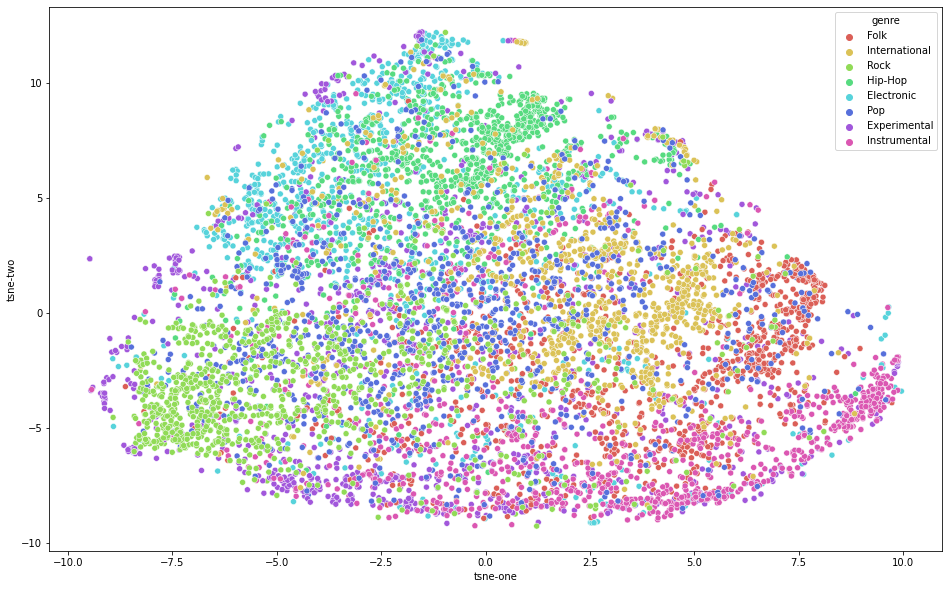

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_viz,
    legend="full",
    alpha=1
)

In [117]:
sub_df = df_viz[df_viz.genre.isin(['Electronic', 'Hip-Hop', 'Rock', 'Instrumental', 'Folk'])]

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

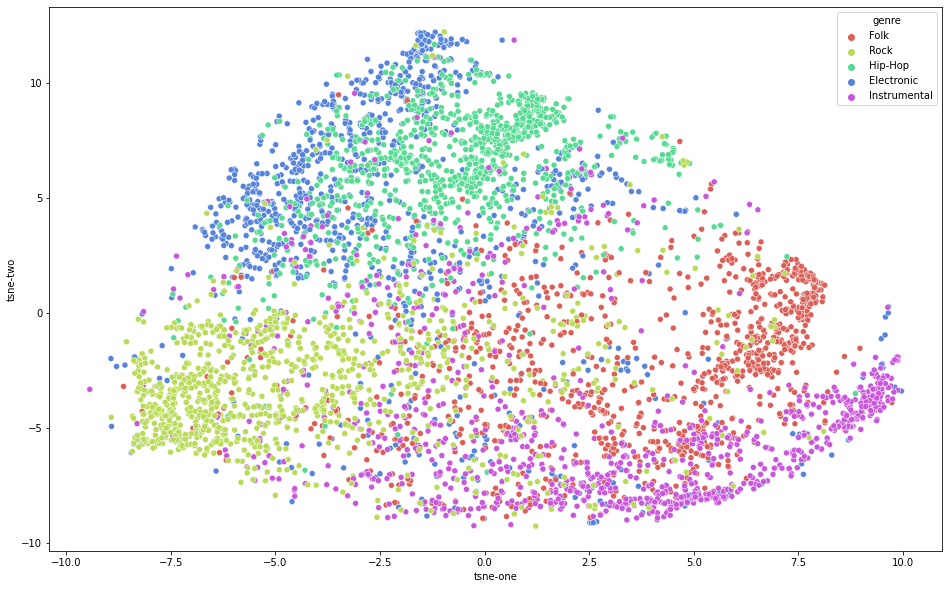

In [120]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 5),
    data=sub_df,
    legend="full",
    alpha=1
)

In [121]:
tsne = TSNE(n_components=3, verbose=0, perplexity=5, learning_rate=10)
tsne_results = tsne.fit_transform(X)

In [122]:
df_viz['tsne-one'] = tsne_results[:,0]
df_viz['tsne-two'] = tsne_results[:,1]
df_viz['tsne-three'] = tsne_results[:,2]

In [123]:
sub_df = df_viz[df_viz.genre.isin(['Electronic', 'Hip-Hop', 'Rock', 'Instrumental', 'Folk'])]

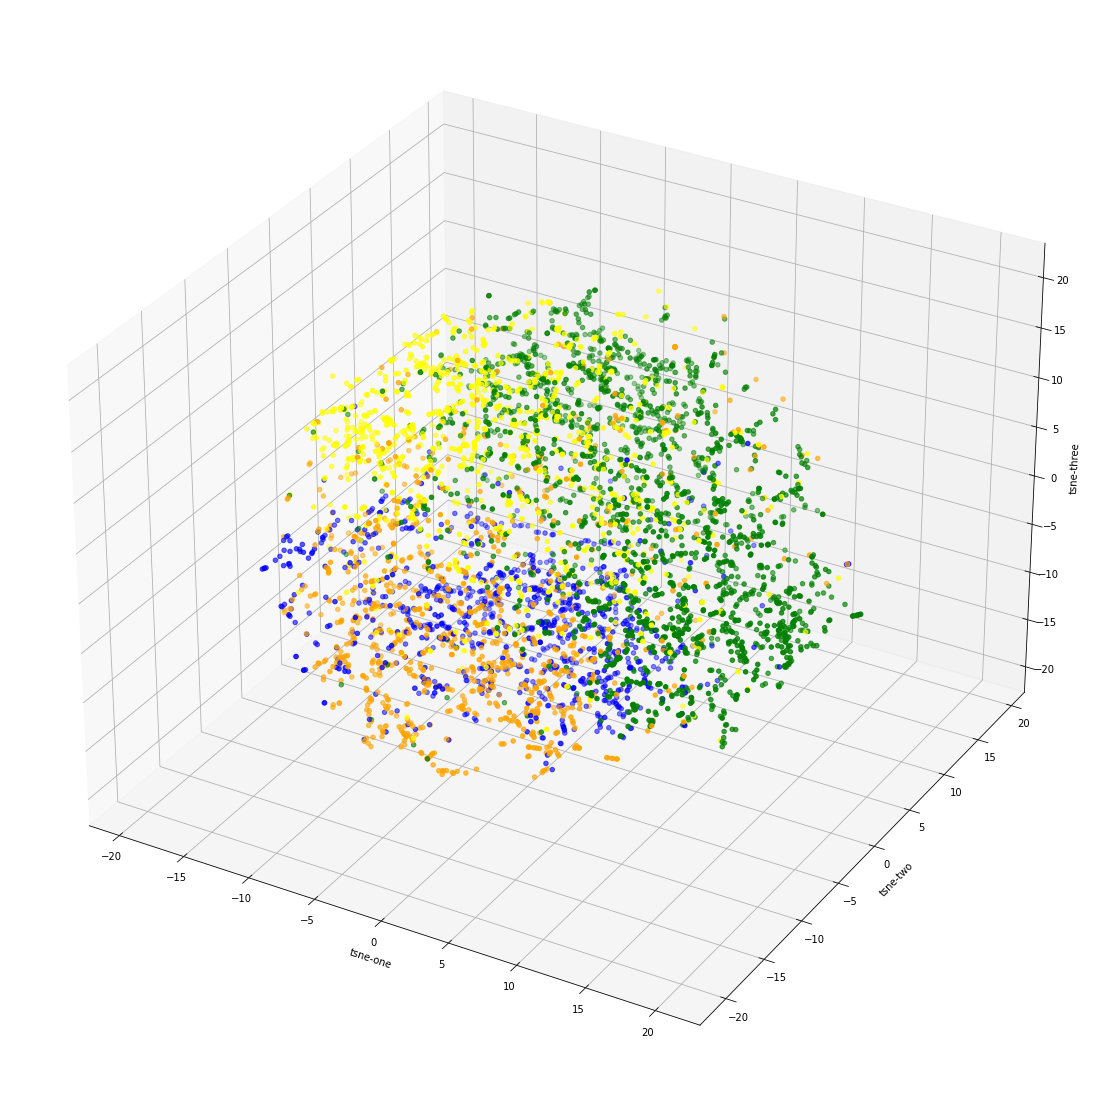

In [124]:
ax = plt.figure(figsize=(30,20)).gca(projection='3d')
ax.scatter(
    xs=sub_df["tsne-one"], 
    ys=sub_df["tsne-two"], 
    zs=sub_df["tsne-three"], 
    c=sub_df["color"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()